<a href="https://colab.research.google.com/github/mmoh-i/HamoyeStageE/blob/main/TimeSeriesFaceBookProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv", parse_dates=[0], delimiter=",")
df.head()


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [ ]:
print(f"null values:{df.isna().sum()}")
print(f"Shape of data: {df.shape}")

null values:FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64
Shape of data: (92016, 5)


In [ ]:
monthly_data = df.set_index('FullDate', inplace=True)
#resampling data by month
monthly_data= df.resample('M').mean()


In [ ]:
monthly_data

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-30,16.906667,1578.145819,3.578663,25.075896
2010-10-31,21.377419,1398.027708,2.799987,22.223629
2010-11-30,24.323333,1484.759104,2.321943,22.575944
2010-12-31,26.696774,1082.167586,2.401429,17.585753
2011-01-31,30.629032,1331.477822,2.917977,103.094603
...,...,...,...,...
2020-10-31,21.374194,123.116935,5.571003,32.966606
2020-11-30,27.986667,20.694651,6.032180,36.725250
2020-12-31,25.525806,-47.401751,6.333106,16.788972


array([<Axes: xlabel='FullDate'>, <Axes: xlabel='FullDate'>,
       <Axes: xlabel='FullDate'>, <Axes: xlabel='FullDate'>], dtype=object)

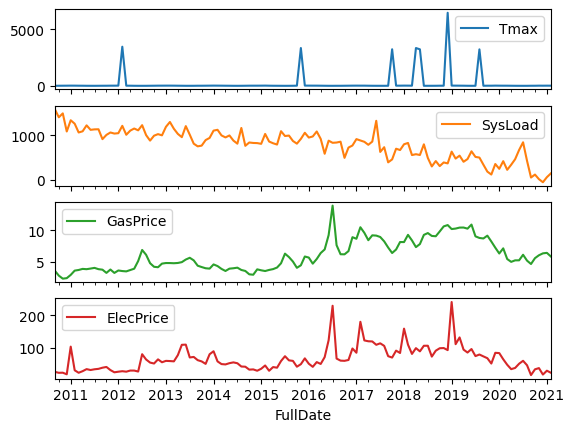

In [ ]:
monthly_data.plot(subplots=True)

In [ ]:
# cols = ['Tmax', 'SysLoad', 'GasPrice', 'ElecPrice']
# for i in cols:
#   plt.subplot(3, 1, 1)
#   #plt.plot(monthly_data.index, df[i])
#   plt.plot(monthly_data.index, monthly_data[i])

#   plt.subplot(3, 1, 2)
#   plt.plot(monthly_data.index, monthly_data[i])

#   plt.subplot(3, 1, 3)
#   plt.plot(monthly_data.index, monthly_data[i])

#   plt.show()

In [ ]:
# #converting FullDate to dateTime
# df['FullDate'] = pd.to_datetime(df['FullDate'])

# #downsampling
# monthly_data = df.resample('M', on='FullDate').sum()

# plt.figure(figsize=(10, 6))
# plt.plot(monthly_data['FullDate'], monthly_data.ElecPrice, marker='*')
# plt.xlabel('Year')
# plt.ylabel('Electricity Price')


In [ ]:
# #installing facebook prophet
# !pip install pystan~=2.14
# !pip install fbprophet


In [ ]:
#modeling
from fbprophet import Prophet


In [ ]:
df

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


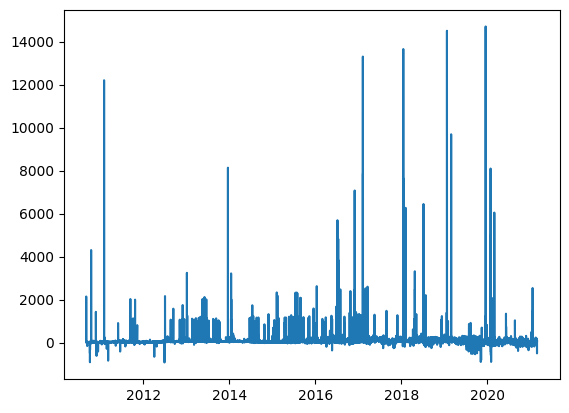

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


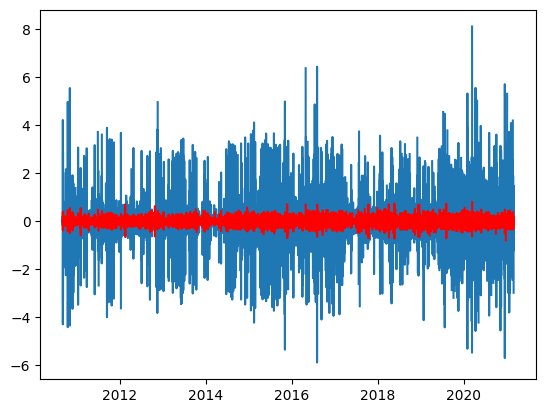

In [ ]:
#df.resample('M').mean()
plt.plot(df.index, df['ElecPrice'])
plt.show()

df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.ElecPrice, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [ ]:
df = df.reset_index()
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [ ]:
print(f"starting date: {str(df['FullDate'].dt.date.min())}")
print(f"end date: {str(df['FullDate'].dt.date.max())}")

starting date: 2010-09-01
end date: 2021-02-28


In [ ]:
data = df[['FullDate', 'ElecPrice']]
data.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)
data

<ipython-input-296-5f407e4dfff1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns= {'FullDate':'ds', 'ElecPrice':'y'}, inplace=True)


,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
train_data = data[:2757]
test_data = data[df.shape[0] - len(train_data):]

In [ ]:
#modelling with FacebookProphet
# X = train_data['ds']
# y = train_data['y']
model = Prophet()
model.fit(train_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
train_data.tail()

,ds,y
2752,2010-12-24 16:00:00,36.770
2753,2010-12-24 17:00:00,35.060
2754,2010-12-24 18:00:00,27.980
2755,2010-12-24 19:00:00,28.115
2756,2010-12-24 20:00:00,27.690


In [ ]:
#evaluating model
from sklearn.metrics import mean_absolute_error
validation_train_data = train_data.reset_index(drop=True)
prediction = model.predict(pd.DataFrame({'ds':validation_train_data['ds']}))
y_actual = validation_train_data['y']
y_pred = prediction['yhat']
y_pred = y_pred.astype(int)
mean_absolute_error(y_actual, y_pred)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


14.150409865796155

In [ ]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-09-01 00:00:00,37.547173,-77.234092,173.488889,37.547173,37.547173,7.708318,7.708318,7.708318,0.309255,0.309255,0.309255,7.399063,7.399063,7.399063,0.0,0.0,0.0,45.255491
1,2010-09-01 01:00:00,37.497537,-78.495428,174.265569,37.497537,37.497537,6.710280,6.710280,6.710280,-1.574145,-1.574145,-1.574145,8.284425,8.284425,8.284425,0.0,0.0,0.0,44.207817
2,2010-09-01 02:00:00,37.447902,-87.011084,171.548287,37.447902,37.447902,3.172329,3.172329,3.172329,-5.996992,-5.996992,-5.996992,9.169321,9.169321,9.169321,0.0,0.0,0.0,40.620231
3,2010-09-01 03:00:00,37.398267,-91.854688,170.299295,37.398267,37.398267,-0.807416,-0.807416,-0.807416,-10.850790,-10.850790,-10.850790,10.043374,10.043374,10.043374,0.0,0.0,0.0,36.590850
4,2010-09-01 04:00:00,37.348631,-92.168711,153.113207,37.348631,37.348631,-3.292182,-3.292182,-3.292182,-14.188358,-14.188358,-14.188358,10.896176,10.896176,10.896176,0.0,0.0,0.0,34.056449


/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


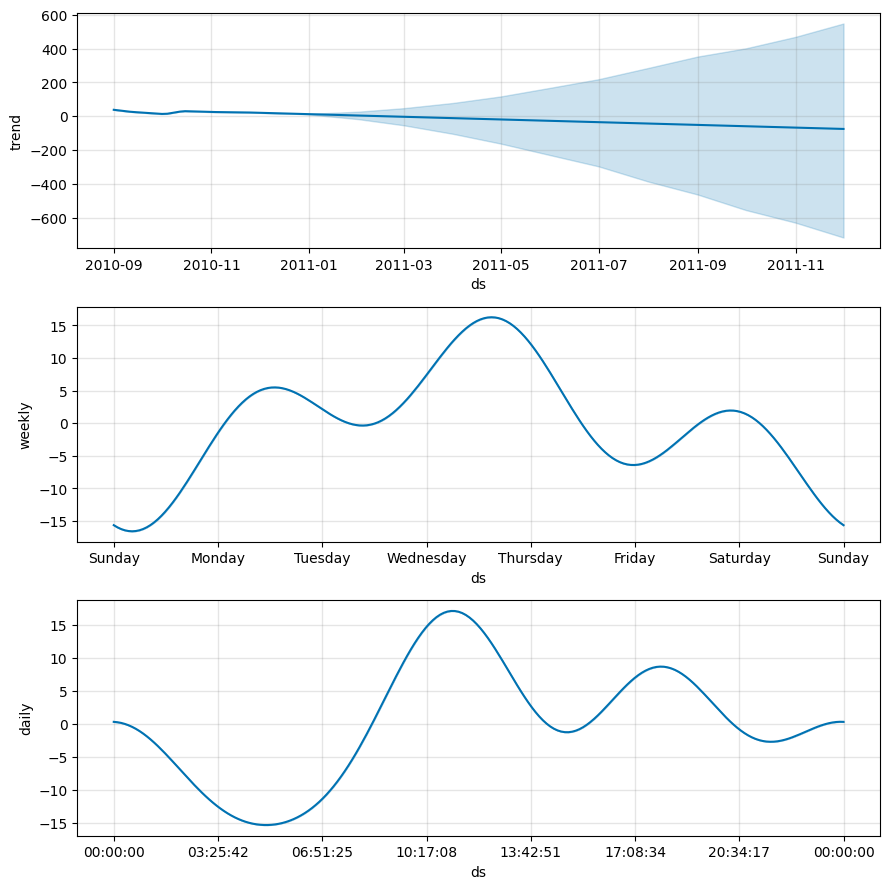

In [ ]:
train_future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(train_future)
forecast.head()
model.plot_components(forecast)
plt.show()

In [ ]:
forecast.loc['2010-12-24 20:00:00':, :]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2011,2010-11-23 19:00:00,21.735162,-105.009814,169.797681,21.735162,21.735162,9.744802,9.744802,9.744802,6.434580,6.434580,6.434580,3.310222,3.310222,3.310222,0.0,0.0,0.0,31.479964
2012,2010-11-23 20:00:00,21.724383,-103.695806,146.880396,21.724383,21.724383,5.675213,5.675213,5.675213,1.622964,1.622964,1.622964,4.052249,4.052249,4.052249,0.0,0.0,0.0,27.399596
2013,2010-11-23 21:00:00,21.713603,-106.430588,162.661870,21.713603,21.713603,2.779133,2.779133,2.779133,-2.061665,-2.061665,-2.061665,4.840798,4.840798,4.840798,0.0,0.0,0.0,24.492736
2014,2010-11-23 22:00:00,21.702824,-103.764283,149.573149,21.702824,21.702824,3.187571,3.187571,3.187571,-2.479957,-2.479957,-2.479957,5.667528,5.667528,5.667528,0.0,0.0,0.0,24.890394
2015,2010-11-23 23:00:00,21.692044,-101.378294,153.877112,21.692044,21.692044,5.824450,5.824450,5.824450,-0.699005,-0.699005,-0.699005,6.523455,6.523455,6.523455,0.0,0.0,0.0,27.516494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11512,2011-12-24 16:00:00,-81.964023,-778.511264,659.068524,-756.716803,667.577892,-8.083222,-8.083222,-8.083222,1.648940,1.648940,1.648940,-9.732162,-9.732162,-9.732162,0.0,0.0,0.0,-90.047245
11513,2011-12-24 17:00:00,-81.974938,-765.328727,662.902377,-756.815785,667.701998,-4.222834,-4.222834,-4.222834,6.438318,6.438318,6.438318,-10.661152,-10.661152,-10.661152,0.0,0.0,0.0,-86.197772
11514,2011-12-24 18:00:00,-81.985853,-792.341890,682.297641,-756.914768,667.826105,-2.879562,-2.879562,-2.879562,8.674857,8.674857,8.674857,-11.554419,-11.554419,-11.554419,0.0,0.0,0.0,-84.865414
11515,2011-12-24 19:00:00,-81.996767,-775.003128,668.938065,-757.013751,667.950211,-5.967034,-5.967034,-5.967034,6.434580,6.434580,6.434580,-12.401614,-12.401614,-12.401614,0.0,0.0,0.0,-87.963801


In [ ]:
#using the test data
test_data.head()

,ds,y
89259,2020-11-06 03:00:00,55.320
89260,2020-11-06 04:00:00,62.580
89261,2020-11-06 05:00:00,67.685
89262,2020-11-06 06:00:00,95.965
89263,2020-11-06 07:00:00,72.345


In [ ]:
test_pred = model.predict(pd.DataFrame({'ds':test_data['ds']}))

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [ ]:
test_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-06 03:00:00,-930.555536,-22680.629833,19840.734100,-22717.425775,19796.623924,-16.765481,-16.765481,-16.765481,-10.850790,-10.850790,-10.850790,-5.914691,-5.914691,-5.914691,0.0,0.0,0.0,-947.321017
1,2020-11-06 04:00:00,-930.566451,-22630.762911,19834.912333,-22717.772836,19797.261990,-19.790090,-19.790090,-19.790090,-14.188358,-14.188358,-14.188358,-5.601732,-5.601732,-5.601732,0.0,0.0,0.0,-950.356541
2,2020-11-06 05:00:00,-930.577366,-22716.615320,19835.050569,-22718.119898,19797.900056,-20.533023,-20.533023,-20.533023,-15.308869,-15.308869,-15.308869,-5.224154,-5.224154,-5.224154,0.0,0.0,0.0,-951.110389
3,2020-11-06 06:00:00,-930.588281,-22596.094130,19772.153272,-22718.466959,19798.538122,-19.020351,-19.020351,-19.020351,-14.230259,-14.230259,-14.230259,-4.790091,-4.790091,-4.790091,0.0,0.0,0.0,-949.608631
4,2020-11-06 07:00:00,-930.599195,-22635.075922,19765.865381,-22718.814021,19799.176188,-14.985817,-14.985817,-14.985817,-10.677448,-10.677448,-10.677448,-4.308369,-4.308369,-4.308369,0.0,0.0,0.0,-945.585012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2752,2021-02-28 19:00:00,-960.593015,-23902.209806,20896.681050,-23866.948020,20919.487888,-0.288149,-0.288149,-0.288149,6.434580,6.434580,6.434580,-6.722729,-6.722729,-6.722729,0.0,0.0,0.0,-960.881163
2753,2021-02-28 20:00:00,-960.603930,-23886.614818,20997.938039,-23867.193486,20919.883356,-4.021239,-4.021239,-4.021239,1.622964,1.622964,1.622964,-5.644203,-5.644203,-5.644203,0.0,0.0,0.0,-964.625169
2754,2021-02-28 21:00:00,-960.614844,-23861.422421,20929.602967,-23867.438951,20920.286914,-6.629566,-6.629566,-6.629566,-2.061665,-2.061665,-2.061665,-4.567900,-4.567900,-4.567900,0.0,0.0,0.0,-967.244410
2755,2021-02-28 22:00:00,-960.625759,-23899.780478,20942.725631,-23867.684417,20920.691983,-5.984396,-5.984396,-5.984396,-2.479957,-2.479957,-2.479957,-3.504439,-3.504439,-3.504439,0.0,0.0,0.0,-966.610155


In [ ]:
y_hat = test_pred['yhat'].astype(int)

In [ ]:
test_data['y'] = y_hat

<ipython-input-268-fc2c2a6c321a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = y_hat


In [ ]:
test_predict = test_pred.yhat

In [ ]:
test_predict = test_predict.astype(int)
test_predict

0      -947
1      -950
2      -951
3      -949
4      -945
       ... 
2752   -960
2753   -964
2754   -967
2755   -966
2756   -963
Name: yhat, Length: 2757, dtype: int64

In [ ]:
test_data.loc[:,'y'] = test_predict.values

<ipython-input-275-d5ef5dac3e8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:,'y'] = test_predict.values


In [ ]:
test

In [ ]:

test_data = pd.DataFrame({'ds':test_data["ds"], 'y':test_predict})
test_data

,ds,y
89259,NaN,NaN
89260,NaN,NaN
89261,NaN,NaN
89262,NaN,NaN
89263,NaN,NaN
...,...,...
92011,NaN,NaN
92012,NaN,NaN
92013,NaN,NaN
92014,NaN,NaN


In [ ]:

#test_predict = test_predict.astype(int)
test_data['y'] = test_predict['yhat'].astype(int)
test_data.head()

KeyError: ignored

In [ ]:
df2 = df[['Tmax', 'SysLoad', 'GasPrice']]
df2.rename(columns={'Tmax': 'add1', 'SysLoad': 'add2', 'GasPrice': 'add3'}, inplace=True)
df2

<ipython-input-174-49955d35fe48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'Tmax': 'add1', 'SysLoad': 'add2', 'GasPrice': 'add3'}, inplace=True)


,add1,add2,add3
0,15.8,1688.21500,3.6900
1,15.8,1669.19500,3.6900
2,15.8,1491.98000,3.6900
3,15.8,1330.76000,3.6900
4,15.8,1247.94000,3.6900
...,...,...,...
92011,24.3,449.63625,5.4848
92012,24.3,815.59975,5.4848
92013,24.3,745.12325,5.4848
92014,24.3,694.95150,5.4848


In [ ]:
#adding regressor of df2
model.add_regressor()

AttributeError: ignored